In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('/Users/zhusijie/Desktop/062023_Guerlain_Training_Data CRM.csv')
df.head()

,Delivery Market Name,Campaign,Channel,Date,Com sent,with success,Nb of Opening,Nb of Clicks,Transactions generated,Turnover,Turnover Online,Turnover Offline,Nb of Items Bought
0,France,MMAG Noël 2020 Boutiques,Direct Mail,2020-10-19 00:00:00,68412,68412,0,0,7627.0,1317752.77,162279.0,1155473.0,37477.0
1,France,Mailing Réouverture Boutiques Juin 2020,Direct Mail,2020-06-10 00:00:00,49280,49280,0,0,3377.0,547414.85,5316.0,542099.0,16625.0
2,France,Tactical_SMS_FR_Shopping_Noel_20201217,SMS/MMS,2020-12-17 00:00:00,66813,63580,0,0,2785.0,493857.09,16652.0,477206.0,15241.0
3,France,Mailing Postal MMAG Septembre 2020 Boutiques,Direct Mail,2020-07-24 00:00:00,49984,49984,0,0,2505.0,429004.67,12643.0,416362.0,12789.0
4,France,Tactical_MMS_fr_Noel_20201207,SMS/MMS,2020-12-11 00:00:00,55895,0,0,0,1922.0,335971.50,20745.0,315226.0,11013.0


In [4]:
df.shape

(3336, 13)

### Open rate by channel

In [5]:
df['Channel'].value_counts().reset_index()

,Channel,count
0,Email,3052
1,SMS/MMS,141
2,Direct Mail,103
3,Clienteling,40


Most of Campaign were made in the email channel

In [6]:
by_channel = df.groupby('Channel')[['Com sent','with success','Nb of Opening','Nb of Clicks','Transactions generated']].sum().reset_index()
by_channel['open_rate'] = by_channel['Nb of Opening']/by_channel['Com sent']

In [7]:
by_channel['success_rate'] = by_channel['with success']/by_channel['Com sent']
by_channel['click_rate'] = by_channel['Nb of Clicks']/by_channel['Com sent']

In [8]:
by_channel['taux_clic'] = by_channel['Nb of Clicks']/by_channel['with success']
by_channel['taux_active'] = by_channel['Nb of Clicks']/ by_channel['Nb of Opening']

In [9]:
by_channel['taux conversion'] = by_channel['Transactions generated']/by_channel['Com sent']

In [10]:
by_channel

,Channel,Com sent,with success,Nb of Opening,Nb of Clicks,Transactions generated,open_rate,success_rate,click_rate,taux_clic,taux_active,taux conversion
0,Clienteling,309348,12333,0,0,1648.0,0.000000,0.039868,0.000000,0.00000,NaN,0.005327
1,Direct Mail,553876,553159,0,0,26625.0,0.000000,0.998705,0.000000,0.00000,NaN,0.048070
2,Email,23266481,22979760,4175387,429021,23863.0,0.179459,0.987677,0.018439,0.01867,0.10275,0.001026
3,SMS/MMS,676381,469014,0,0,14045.0,0.000000,0.693417,0.000000,0.00000,NaN,0.020765


conversition rate

<Axes: xlabel='Channel'>

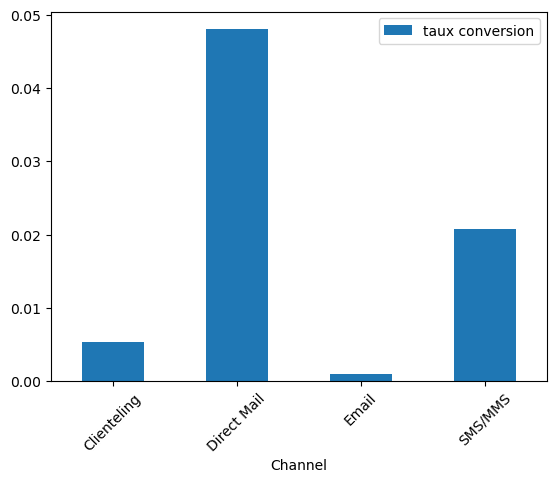

In [11]:
by_channel[['Channel', 'taux conversion']].plot(kind = 'bar',x='Channel', y='taux conversion', rot = 45)

Missing data ?  
- Direct email and Email has higher success rate
- SMS/MMS has very low success rate, but it has second high conversion rate, so we can send more SMS/MMS
- Email has lowest conversion rate, we may need to do further analysis
- Direct email has higher conversion rate

### Open rate by market

In [12]:
market = df.groupby('Delivery Market Name')[['Com sent','with success','Nb of Opening','Nb of Clicks','Transactions generated']].sum().reset_index()

In [13]:
market['open_rate'] = market['Nb of Opening']/market['Com sent']
market['taux_clic'] = market['Nb of Clicks']/market['with success']
market['taux_active'] = market['Nb of Clicks']/ market['Nb of Opening']
market['taux conversion'] = market['Transactions generated']/market['Com sent']

In [14]:
market

,Delivery Market Name,Com sent,with success,Nb of Opening,Nb of Clicks,Transactions generated,open_rate,taux_clic,taux_active,taux conversion
0,France,24745526,23957038,4153627,425159,65963.0,0.167854,0.017747,0.102358,0.002666
1,Italy,60560,57228,21760,3862,218.0,0.359313,0.067484,0.177482,0.003600


- Italy has much higher open rate and click rate and clic rate, even it has lower success rate.
- BUT there is no big difference in conversion rate, not as much as open rate. so may be the email title is very interesting, but no good for conversion

### open rate details by market and channel 

In [15]:
details = df.groupby(['Delivery Market Name','Channel'])[['Com sent','with success','Nb of Opening','Nb of Clicks','Transactions generated']].sum().reset_index()

In [16]:
details['open_rate'] = details['Nb of Opening']/details['Com sent']

In [17]:
details['taux_clic'] = details['Nb of Clicks']/details['with success']
details['taux_active'] = details['Nb of Clicks']/ details['Nb of Opening']
details['taux conversion'] = details['Transactions generated']/details['Com sent']

In [18]:
details

,Delivery Market Name,Channel,Com sent,with success,Nb of Opening,Nb of Clicks,Transactions generated,open_rate,taux_clic,taux_active,taux conversion
0,France,Clienteling,309348,12333,0,0,1648.0,0.000000,0.000000,NaN,0.005327
1,France,Direct Mail,553876,553159,0,0,26625.0,0.000000,0.000000,NaN,0.048070
2,France,Email,23205921,22922532,4153627,425159,23645.0,0.178990,0.018548,0.102358,0.001019
3,France,SMS/MMS,676381,469014,0,0,14045.0,0.000000,0.000000,NaN,0.020765
4,Italy,Email,60560,57228,21760,3862,218.0,0.359313,0.067484,0.177482,0.003600


- Italy has much higher email open rate, 35.93% VS 17.89%
- Italy has much higher clic rate and active rate 6.74% VS 1.85%, 17.75% VS 10.24%


<Axes: xlabel='key'>

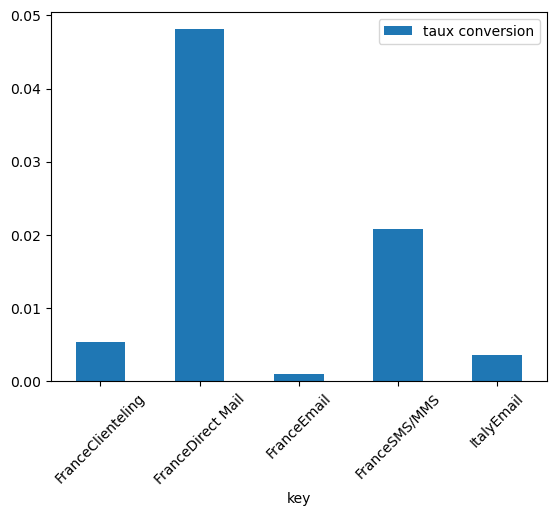

In [19]:
details['key'] = details['Delivery Market Name']+details['Channel']
details[['key','taux conversion' ]].plot(kind = 'bar',x='key', y='taux conversion', rot = 45)

### PS : by different month, we have 12 month, we can calculate to see if month has an impact on conversion rate or other kpis

In [20]:
# change date to datetime type instead of object
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
import datetime as dt
df['month'] = df['Date'].dt.month

In [22]:
months = df.groupby('month')[['Com sent','with success','Nb of Opening','Nb of Clicks','Transactions generated']].sum().reset_index()

In [23]:
months['open_rate'] = months['Nb of Opening']/months['Com sent']
months['taux_clic'] = months['Nb of Clicks']/months['with success']
months['taux_active'] = months['Nb of Clicks']/ months['Nb of Opening']
months['taux conversion'] = months['Transactions generated']/months['Com sent']

In [24]:
months

,month,Com sent,with success,Nb of Opening,Nb of Clicks,Transactions generated,open_rate,taux_clic,taux_active,taux conversion
0,1,1314055,1290960,254223,21531,4126.0,0.193465,0.016678,0.084693,0.003140
1,2,1359980,1341180,252222,25401,6484.0,0.185460,0.018939,0.100709,0.004768
2,3,1361061,1340935,354550,33170,1463.0,0.260495,0.024736,0.093555,0.001075
3,4,2260106,2204966,389958,43458,1951.0,0.172540,0.019709,0.111443,0.000863
4,5,2694118,2663311,455753,49698,4037.0,0.169166,0.018660,0.109046,0.001498
5,6,1809080,1785282,281891,30488,6492.0,0.155820,0.017077,0.108155,0.003589
6,7,2439881,2412786,383827,34561,6097.0,0.157314,0.014324,0.090043,0.002499
7,8,1446418,1412760,229686,18865,2778.0,0.158796,0.013353,0.082134,0.001921
8,9,1766754,1733285,334191,33495,4869.0,0.189155,0.019325,0.100227,0.002756
9,10,2452993,2403332,338094,35955,14632.0,0.137829,0.014960,0.106346,0.005965


<Axes: xlabel='month'>

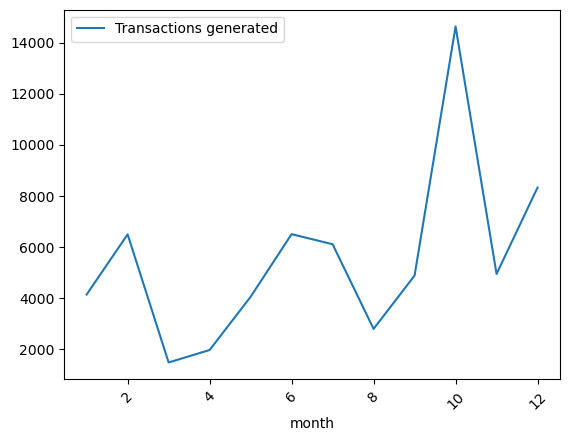

In [25]:
months.plot(kind='line', x= 'month', y ='Transactions generated', rot=45)